<a href="https://colab.research.google.com/github/Aj7779/CapstoneProject/blob/hotel_booking_analysis/Cpstone_Project_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
#import pandas package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import datetime as dt
import plotly.graph_objects as pgo

In [261]:
# read csv data in pandas data frames 

url = ('/content/Hotel Bookings.csv')
df = pd.read_csv('Hotel Bookings.csv', quoting=csv.QUOTE_NONE, error_bad_lines=False)

print(df)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [262]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [263]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [264]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [266]:
df.shape

(119390, 32)

In [267]:
# count null values
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [268]:
#count all null values in percentage
round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


In [269]:
df['country'].fillna(value = df['country'].mode()[0], inplace = True)

In [270]:
df['company'].fillna(value = df['company'].mode()[0], inplace = True)

In [271]:
df['agent'].fillna(value=df['agent'].mode()[0],inplace=True)

In [272]:
df['is_repeated_guest'].fillna(value=df['is_repeated_guest'].mode()[0],inplace=True)

In [273]:
df['previous_cancellations'].fillna(value=df['previous_cancellations'].mode()[0],inplace=True)

In [274]:
df['reservation_status'].fillna(value=df['reservation_status'].mode()[0],inplace=True)

In [275]:
df['total_of_special_requests'].fillna(value=df['total_of_special_requests'].mode()[0],inplace=True)

In [276]:
df['required_car_parking_spaces'].fillna(value=df['required_car_parking_spaces'].mode()[0],inplace=True)

In [277]:
df['adr'].fillna(value=df['adr'].mode()[0],inplace=True)

In [278]:
df['customer_type'].fillna(value=df['customer_type'].mode()[0],inplace=True)

In [279]:
df['days_in_waiting_list'].fillna(value=df['days_in_waiting_list'].mode()[0],inplace=True)

In [280]:
df['deposit_type'].fillna(value=df['deposit_type'].mode()[0],inplace=True)

In [281]:
df['days_in_waiting_list'].fillna(value=df['days_in_waiting_list'].mode()[0],inplace=True)

In [282]:
df['booking_changes'].fillna(value=df['booking_changes'].mode()[0],inplace=True)

In [283]:
df['assigned_room_type'].fillna(value=df['assigned_room_type'].mode()[0],inplace=True)

In [284]:
df['reserved_room_type'].fillna(value=df['reserved_room_type'].mode()[0],inplace=True)

In [285]:
df['previous_bookings_not_canceled'].fillna(value=df['previous_bookings_not_canceled'].mode()[0],inplace=True)

In [286]:
df['reservation_status_date'].fillna(value=df['reservation_status_date'].mode()[0],inplace=True)

In [287]:
df['distribution_channel'].fillna(value=df['distribution_channel'].mode()[0],inplace=True)

In [288]:
df['market_segment'].fillna(value=df['market_segment'].mode()[0],inplace=True)

In [289]:
df['meal'].fillna(value=df['meal'].mode()[0],inplace=True)

In [290]:
df['babies'].fillna(value=df['babies'].mode()[0],inplace=True)

In [291]:
df['children'].fillna(value=df['children'].mode()[0],inplace=True)

In [292]:
df['adults'].fillna(value=df['adults'].mode()[0],inplace=True)

In [293]:
df['stays_in_week_nights'].fillna(value=df['stays_in_week_nights'].mode()[0],inplace=True)

In [294]:
df['stays_in_weekend_nights'].fillna(value=df['stays_in_weekend_nights'].mode()[0],inplace=True)

In [295]:
df['arrival_date_day_of_month'].fillna(value=df['arrival_date_day_of_month'].mode()[0],inplace=True)

In [296]:
df['arrival_date_week_number'].fillna(value=df['arrival_date_week_number'].mode()[0],inplace=True)

In [297]:
# checking null values is cleared

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [298]:
# total column
cat_columns = ['hotel', 'is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest','previous_cancellations', 'previous_cancellations','previous_bookings_not_canceled','reserved_room_type', 'assigned_room_type','booking_changes', 'deposit_type','agent','company','days_in_waiting_list', 'customer_type','adr','required_car_parking_spaces','total_of_special_requests', 'reservation_status']

In [299]:
# Unique values in each column
print(f"Unique values of categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('*' * 100)

UNIQUE VALUES OF CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

****************************************************************************************************

is_canceled: 
[0 1]

****************************************************************************************************

lead_time: 
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160

In [300]:
#Replacing 'undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [301]:
#Rechecking unique values in meal column

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [302]:
#Dropping rows with 0 adults

df.drop(df[df['adults'] == 0].index, inplace = True)

In [303]:
#Verification

len(df[df['adults'] == 0])

0

In [304]:
# storing all columns into feature variable
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

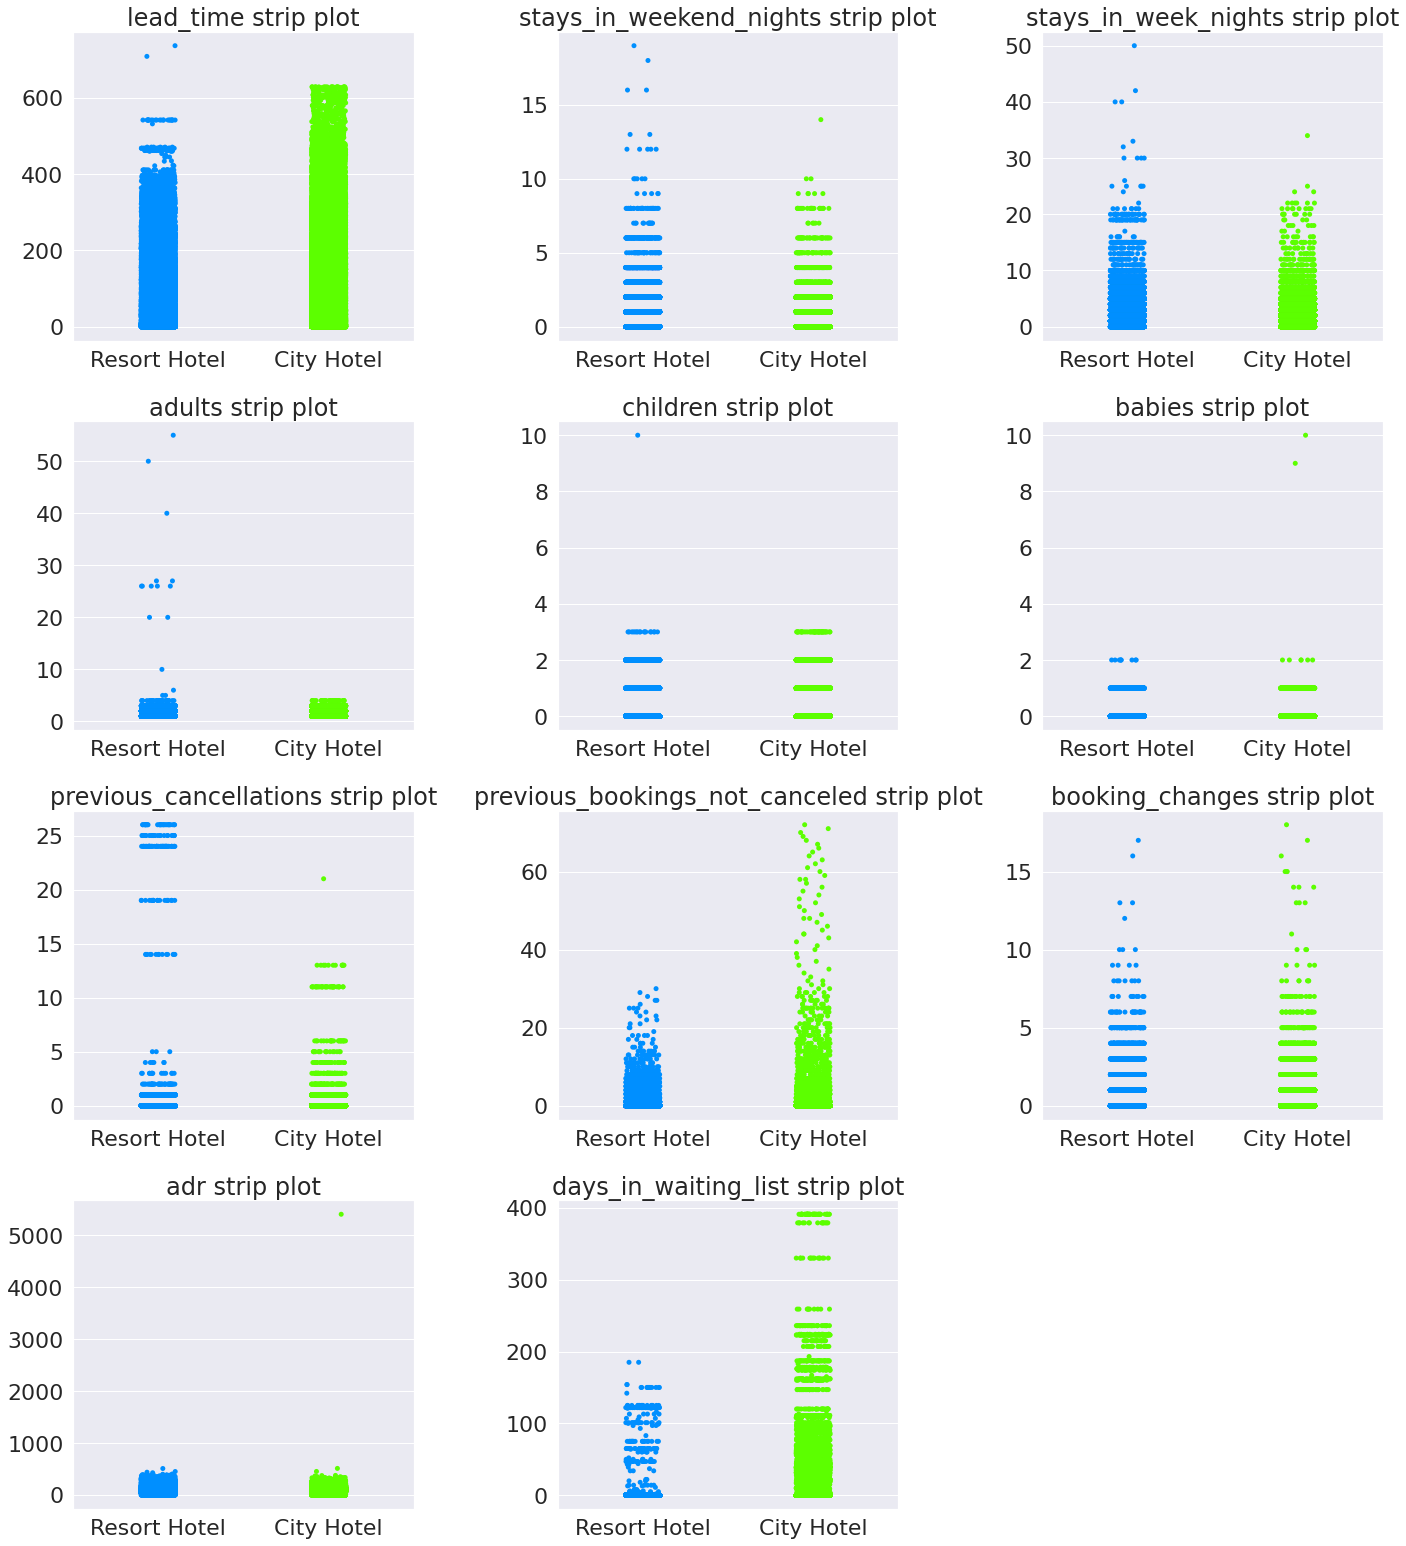

In [305]:
#Creating a stripplot of data distribution between hotels

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 2.0)
plt.figure(figsize = (20,22))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'gist_rainbow_r').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()

In [306]:
# Number of bookings that have more than 10 previous bookings not canceled for resort

num_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['hotel'] == 'Resort Hotel')])

In [307]:
# Number of bookings made by companies that had more than 10 previous bookings not canceled for resort

num_companies_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] > 0) & (df['hotel'] == 'Resort Hotel')])


In [308]:
# Number of bookings made by private individuals that had more than 10 previous bookings not canceled for resort

num_indiv_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] == 0) & (df['hotel'] == 'Resort Hotel')])


In [309]:
# percentage of companies and individuals that had more than 10 previous cancellations for the resort

companies_high_pb_percent = round((num_companies_high_pb / num_high_pb) * 100, 2)
                            
indiv_high_pb_percent = round((num_indiv_high_pb / num_high_pb) * 100, 2)
    
print(f"\nBookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:\n")
print(f"\t{companies_high_pb_percent} % were made by companies.")
print(f"\n\t{indiv_high_pb_percent} % were made by private individuals.")


Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:

	100.0 % were made by companies.

	0.0 % were made by private individuals.


In [310]:
# Using loc[] to set new values for outliers

df.loc[df['lead_time']                      > 380, ['lead_time']                   ] = 380
df.loc[df['stays_in_weekend_nights']        > 6, ['stays_in_weekend_nights']       ] = 6
df.loc[df['stays_in_week_nights']           > 10, ['stays_in_week_nights']         ] = 10
df.loc[df['adults']                         > 4, ['adults']                        ] = 4
df.loc[df['children']                       > 8, ['lead_time']                     ] = 0
df.loc[df['babies']                         > 8, ['babies']                        ] = 0
df.loc[df['booking_changes']                > 5, ['booking_changes']               ] = 5
df.loc[df['days_in_waiting_list']           > 0, ['days_in_waiting_list']          ] = 1
df.loc[df['previous_cancellations']         > 0, ['previous_cancellations']        ] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1

In [311]:
# Dropping row with extreme outlier in adr column

df.drop(df[df['adr'] == 5400].index, inplace = True)

In [312]:
# Counting duplicate data in dataframe

df.duplicated().sum()

32038

In [313]:
# Dropping duplicate rows

df.drop_duplicates(inplace = True)

In [314]:
# Converting datatypes to string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')

In [315]:
# Creating arrival_date column and changing its datatype to datetime

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')  

In [316]:
# Combining children and babies together as kids

df['kids'] = df['children'] + df['babies']

In [317]:
# Creating total_members column

df['total_members'] = df['kids'] + df['adults']

In [318]:
# Total nights per booking

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [319]:
# Changing arrival_date_month column to show month number instead of month name
df['arrival_date_month'] = df['arrival_date'].dt.month

In [320]:
# Creating family column

df['family'] = np.where(df['kids'] > 0, '1', '0')

In [321]:
# Dataset with confirmed bookings only

confirmed_bookings = df[df['is_canceled'] == '0']

In [322]:
# Dataset with canceled bookings only

canceled_bookings = df[df['is_canceled'] == '1']

**Max booking length of stay**

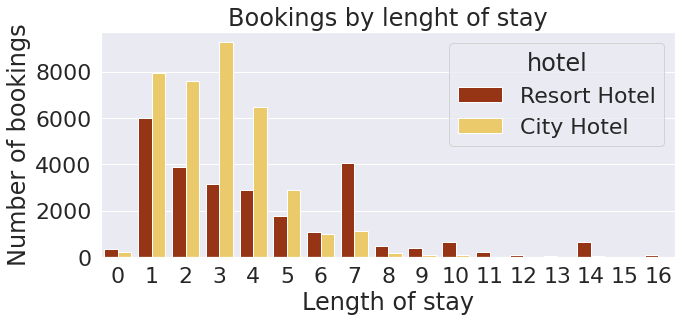

In [323]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'total_nights', data = confirmed_bookings, hue = 'hotel', palette = 'afmhot')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

**Monthly Guest Arrival**

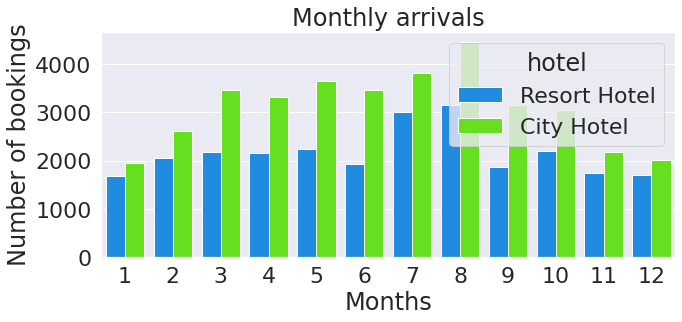

In [324]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'arrival_date_month', data = confirmed_bookings, hue = 'hotel', palette = 'gist_rainbow_r')
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

**Booking By New And Repeated Guest**

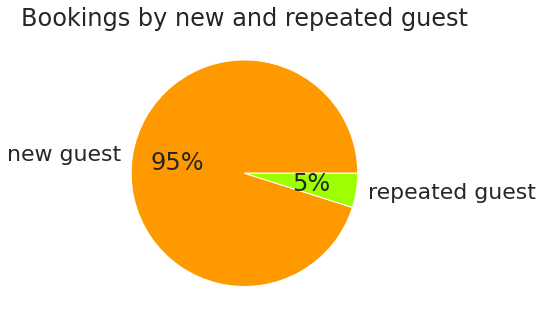

In [325]:
plt.figure(figsize = (10, 5))

data = confirmed_bookings['is_repeated_guest'].value_counts()
colors = sns.color_palette('gist_rainbow')
labels = ['new guest', 'repeated guest']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Bookings by new and repeated guest')

plt.tight_layout()

**Booking By Market Segment And Distribution Channel**



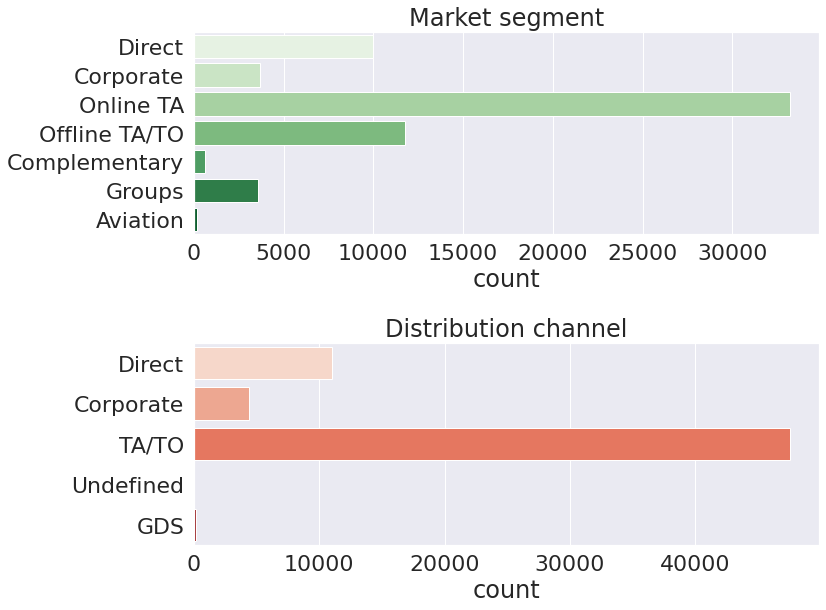

In [326]:
plt.figure(figsize = (12, 9))

plt.subplot(2,1,1)
sns.countplot(data = confirmed_bookings, y = 'market_segment', orient = "h" ,palette = 'Greens').set(ylabel = None)
plt.title('Market segment')

plt.subplot(2,1,2)
sns.countplot(data = confirmed_bookings, y = 'distribution_channel', orient = "h" ,palette = 'Reds').set(ylabel = None)
plt.title('Distribution channel')

plt.tight_layout()

**Cancelation Rate By Resort Hotel And City Hotel**

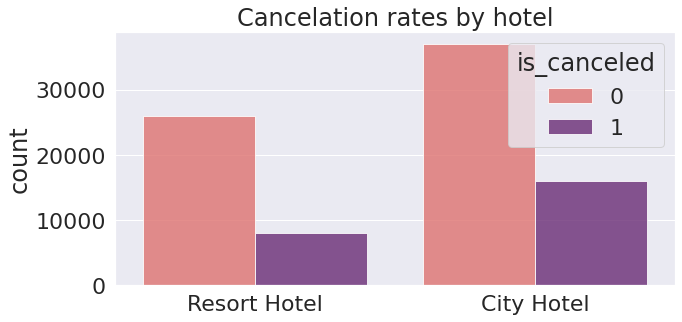

In [327]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

**monthly Average Daily Rate**

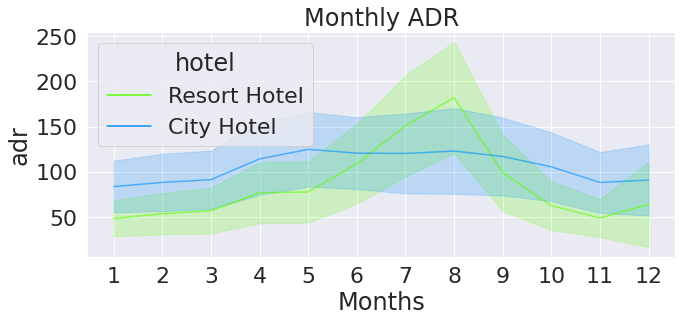

In [328]:
plt.figure(figsize = (10, 5))

months = confirmed_bookings['arrival_date_month'].unique()
sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'gist_rainbow', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

**Customer Type By Hotel (City Hotel And Resort Hotel)**

<Figure size 360x720 with 0 Axes>

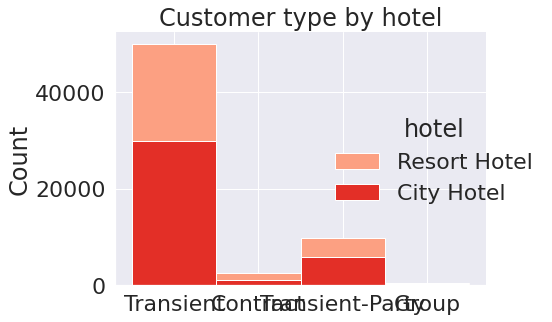

In [329]:
plt.figure(figsize = (5, 10))

sns.displot(confirmed_bookings, x = 'customer_type', hue = 'hotel', multiple = 'stack', palette = 'Reds', alpha = 1.0).set(xlabel = None)
plt.title('Customer type by hotel')

plt.tight_layout()

**Percentage of bookings with meals**

In [330]:
labels = confirmed_bookings['meal'].unique()
values = confirmed_bookings['meal'].value_counts()
palette = ["Pinks", "Greens", "Reds", "Voilets"]
fig = pgo.Figure(data=[pgo.Pie(labels = labels,values = values,  hole=.5,title = 'Meal plans',legendgroup = True,pull = [0.1, 0.1, 0.1, 0.1])])
fig.update_traces(marker = dict(colors = palette))
fig.show()

**Top 5 countires guests comes from**

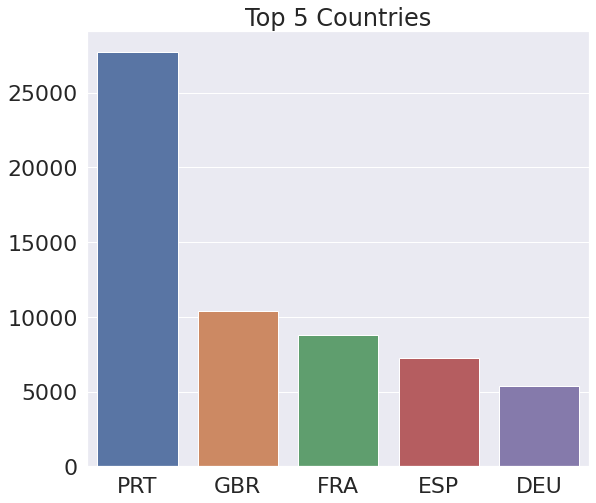

In [331]:
fig, ax = plt.subplots(figsize = (9,8))
ax.set_title('Top 5 Countries')
fig.show()
top_five = df.country.value_counts()[:5]
sns.barplot(x=top_five.index, y=top_five.values)

How long do people stay in the hotels?


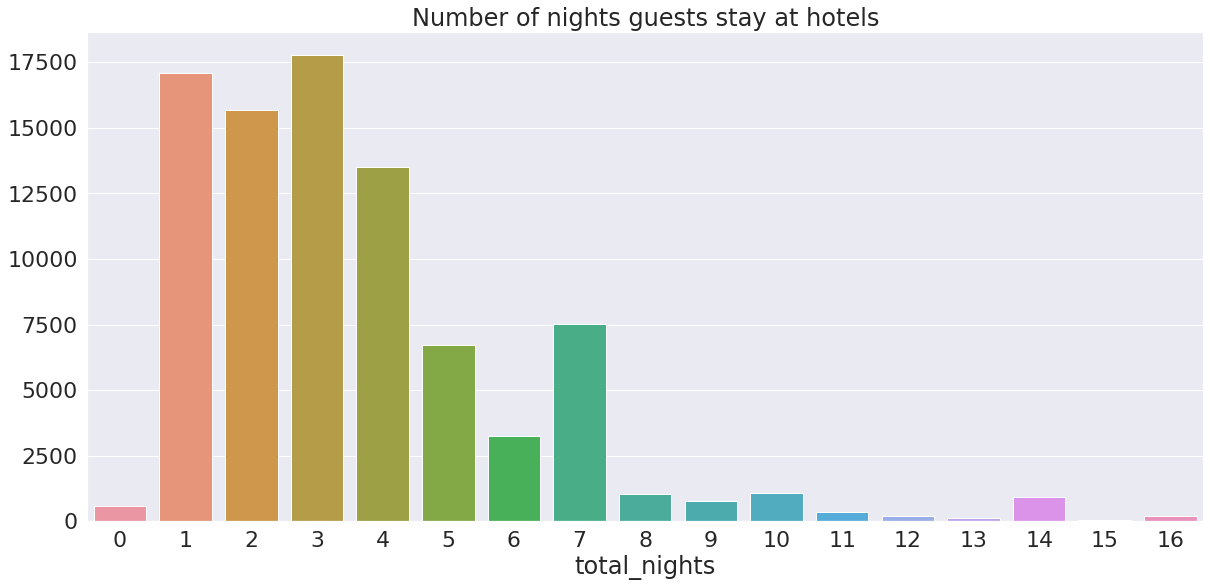

In [332]:
fig, ax = plt.subplots(figsize = (20,9))
ax.set_title('Number of nights guests stay at hotels')
df['total_nights'] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df_tot = df.groupby('total_nights').count()
df_tot = df_tot[df_tot['hotel']>50]['hotel']
sns.barplot(x=df_tot.index, y=df_tot.values)
plt.show()

**Years Wise Bookings**

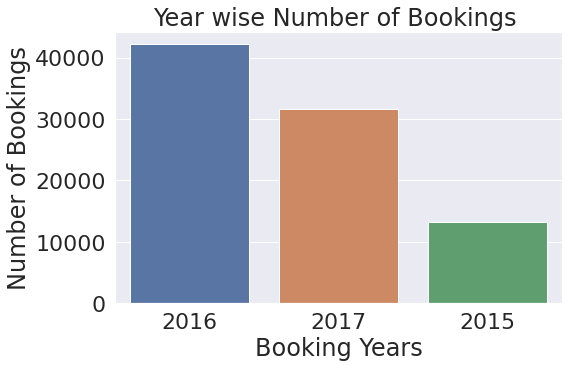

In [333]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=df,order=df.arrival_date_year.value_counts().index)
plt.title('Year wise Number of Bookings ')
plt.xlabel('Booking Years')
plt.ylabel('Number of Bookings')
plt.show()

**Year wise Booking of Hotel Type (Resort Hotel And City Hotel)**

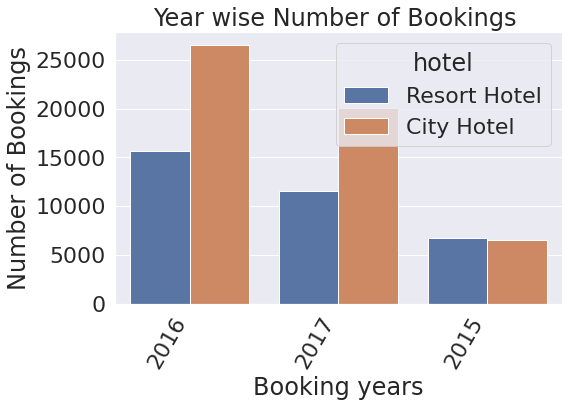

In [334]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=df,order=df.arrival_date_year.value_counts().index,hue='hotel')
plt.title('Year wise Number of Bookings ')
plt.xlabel('Booking years')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()

**How Repeated Geust Come**

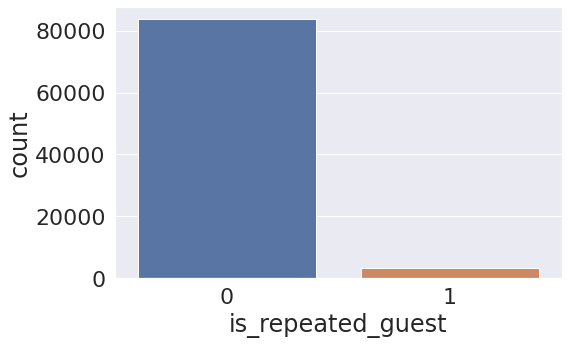

In [335]:
sns.countplot(x='is_repeated_guest',data=df)
plt.show()

**Reserved Room type**

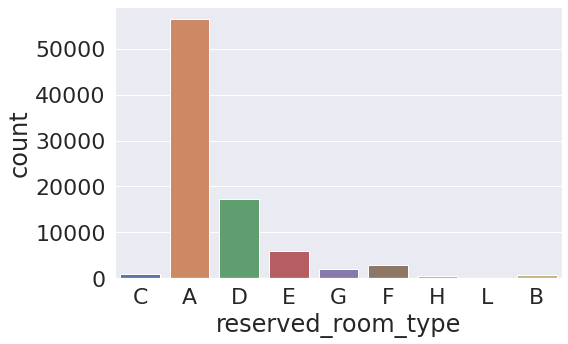

In [336]:
sns.countplot(x='reserved_room_type',data=df)
plt.show()

**Average Daily Rate Over Three Year**

Text(0.5, 1.0, 'Average daily rate trend over three years')

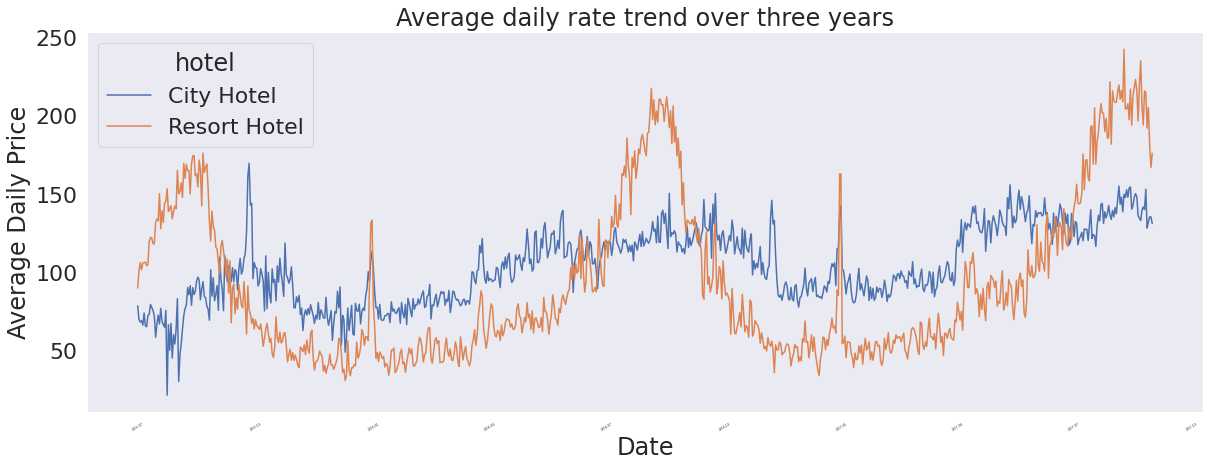

In [337]:
d = df.groupby(['hotel','arrival_date'])['adr'].mean().reset_index().sort_values('arrival_date')
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='arrival_date', y='adr', hue='hotel', data=d)
plt.xlabel("Date")
plt.ylabel("Average Daily Price")
plt.grid()
p = plt.xticks(rotation=30)
ax.tick_params(axis='x', labelsize=3)
plt.title("Average daily rate trend over three years")

**Days in advanced of booking the hotel**

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

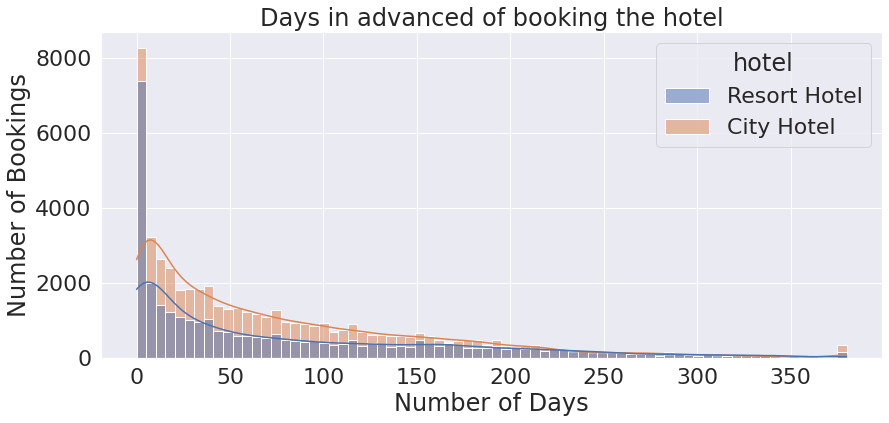

In [338]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=df, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

**Top 25 countries by average number of special requests**

Text(0.5, 1.0, 'Top 25 countries by average number of special requests')

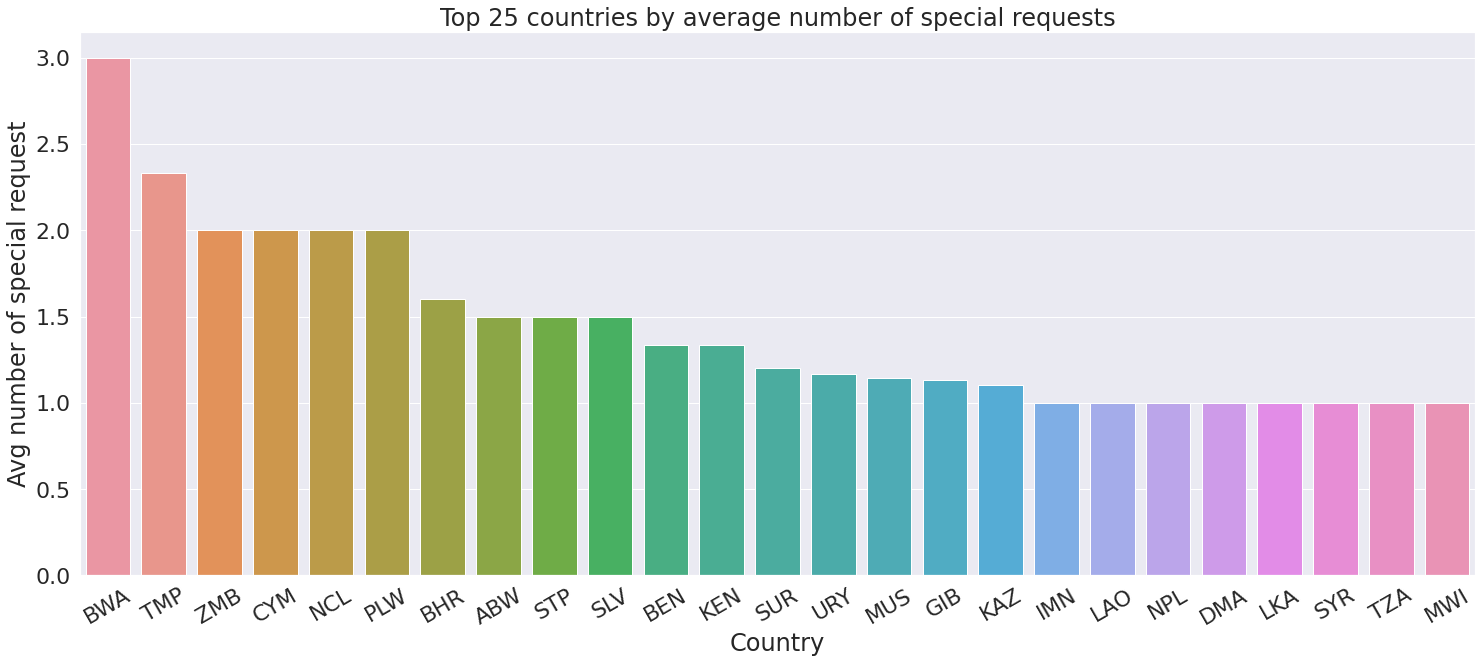

In [339]:
d = df.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:25]
plt.figure(figsize=(25,10))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Avg number of special request")
plt.title("Top 25 countries by average number of special requests")